# Load github repository and weights for models

In [38]:
!rm -r text-detoxification

In [39]:
!git clone https://github.com/Nagim123/text-detoxification

Cloning into 'text-detoxification'...
remote: Enumerating objects: 865, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 865 (delta 47), reused 50 (delta 38), pack-reused 793
Receiving objects: 100% (865/865), 125.88 MiB | 15.98 MiB/s, done.
Resolving deltas: 100% (385/385), done.


In [40]:
%%capture
!pip install transformers
!pip install torchmetrics

In [41]:
!python text-detoxification/src/data/download_weights.py

Start downloading model's weights...
Downloading...
From: https://drive.google.com/uc?id=1ZD3Fi51Cmf_lrvlTlUlx0ZTKoWooLkXD
To: /content/text-detoxification/models/lstm.pt
100% 89.9M/89.9M [00:00<00:00, 229MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YBajbwVBvdWoNZHSyeTpHtOIv4J6d_my
To: /content/text-detoxification/models/ae_lstm.pt
100% 176M/176M [00:00<00:00, 215MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ilGwJUWX5KKk6caIzPI9wSAoBQ186slv
To: /content/text-detoxification/models/transformer.pt
100% 79.2M/79.2M [00:00<00:00, 256MB/s]
Download successful!


In [42]:
!python text-detoxification/src/data/make_dataset.py --logging

INFO:root:Reading dataset...
INFO:root:Parsing dataset...
INFO:root:Tokenizing and saveing on disk...
2023-10-22 12:06:44.461385: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-22 12:06:46.032532: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-10-22 12:06:47.705393: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-22 12:06:47.705793: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node 

# Testing on a basic sample
Demonstration of trained models.

In [43]:
# Save sample to a file.
sample = "you are very stupid."
with open("test_sample.txt", "w") as test_file:
    test_file.write(sample)

<font color="cyan">Testing LSTM<font/>

In [44]:
!python text-detoxification/src/models/predict_model.py lstm lstm.pt test_sample.txt

2023-10-22 12:08:00.551356: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
["you 're very bad . <eos>"]


<font color="cyan">Testing AutoEncoder LSTM</font>

In [45]:
!python text-detoxification/src/models/predict_model.py ae_lstm ae_lstm.pt test_sample.txt

2023-10-22 12:08:17.338967: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
["<unk> you 're too young ."]


<font color="cyan">Testing Transformer</font>

In [46]:
!python text-detoxification/src/models/predict_model.py transformer transformer.pt test_sample.txt

2023-10-22 12:08:33.817559: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
["you 're very unreasonable ."]


<font color="cyan">Testing T5-paranmt-detox</font>

In [47]:
!python text-detoxification/src/models/predict_model.py T5 _ test_sample.txt

2023-10-22 12:08:50.994246: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
["You're very naive."]


###<font color="lime">Note:</font>
As you can see T5 and custom transformer performed quite well.

# Visualize of training for each model

## Loss graph

In [48]:
from IPython.display import Image, display

<font color="cyan">LSTM losses</font>

In [49]:
!python text-detoxification/src/visualization/visualize.py --plot_losses --model_name lstm

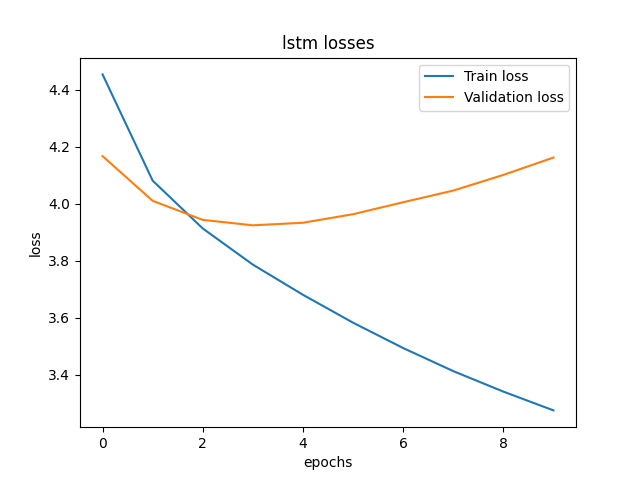

In [50]:
display(Image(filename='text-detoxification/reports/figures/lstm_losses.png'))

<font color="cyan">AutoEncoder LSTM losses</font>

In [51]:
!python text-detoxification/src/visualization/visualize.py --plot_losses --model_name ae_lstm

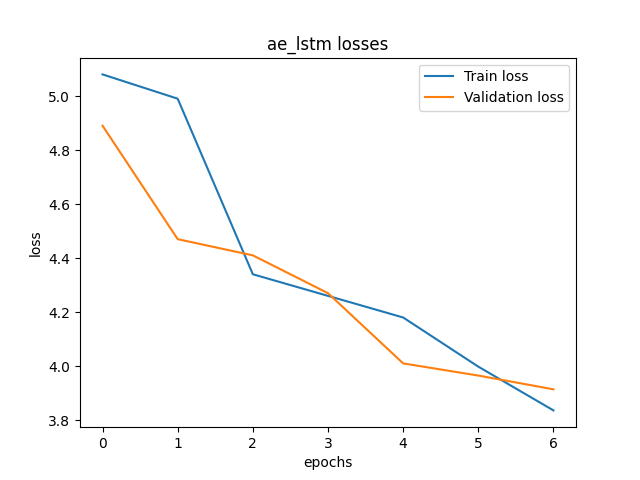

In [52]:
display(Image(filename='text-detoxification/reports/figures/ae_lstm_losses.png'))

<font color="cyan">Transformer losses</font>

In [53]:
!python text-detoxification/src/visualization/visualize.py --plot_losses --model_name transformer

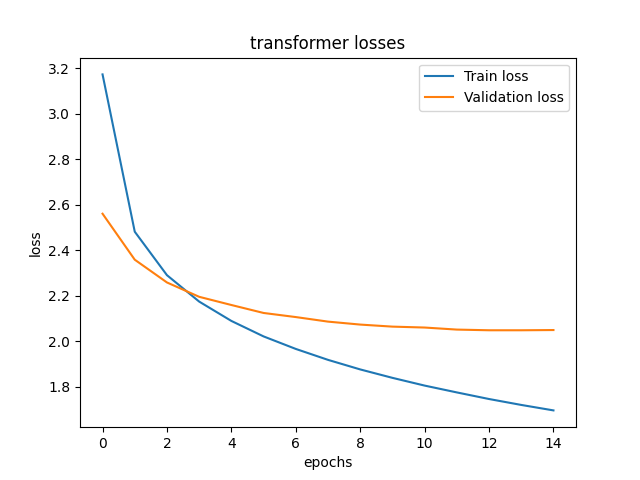

In [54]:
display(Image(filename='text-detoxification/reports/figures/transformer_losses.png'))

# Metric evaluation and visualization

In [55]:
import json

#Calculate mean for each metrics
def calc_means(filename: str):
    with open(filename, "r") as metric_data:
        data = json.loads(metric_data.read())
    # Create lists of metrics
    bleu_scores = []
    ter_scores = []
    rouge1_f1_scores = []
    rouge2_f1_scores = []

    # Collect metrics from metric data
    for entry in data:
        bleu_scores.append(entry["BLEU"])
        ter_scores.append(entry["TER score"])
        rouge1_f1_scores.append(entry["ROUGES"]["rouge1_fmeasure"])
        rouge2_f1_scores.append(entry["ROUGES"]["rouge2_fmeasure"])
    mean_bleu = sum(bleu_scores)/len(bleu_scores)
    mean_ter = sum(ter_scores)/len(ter_scores)
    mean_rouge1 = sum(rouge1_f1_scores)/len(rouge1_f1_scores)
    mean_rouge2 = sum(rouge2_f1_scores)/len(rouge2_f1_scores)
    print(f"BLEU MEAN: {mean_bleu}\nTER MEAN: {mean_ter}\nROUGE1 F1 MEAN: {mean_rouge1}\nROUGE2 F1 MEAN: {mean_rouge2}")

<font color="cyan">LSTM evaluation</font>

In [56]:
!python text-detoxification/src/models/predict_model.py lstm lstm.pt text-detoxification/data/external/test1000.txt --compare text-detoxification/data/external/compare1000.txt --out_dir result_lstm.json

2023-10-22 12:09:22.252336: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [57]:
!python text-detoxification/src/visualization/visualize.py --metric_file result_lstm.json --model_name lstm

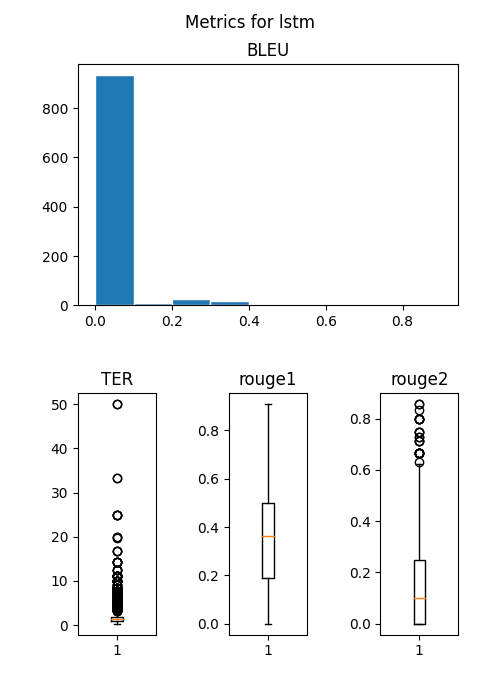

In [58]:
display(Image(filename='text-detoxification/reports/figures/lstm_metrics.png'))

In [59]:
calc_means("result_lstm.json")

BLEU MEAN: 0.021236625257191007
TER MEAN: 2.441665008113339
ROUGE1 F1 MEAN: 0.3397498675096374
ROUGE2 F1 MEAN: 0.1542850395861816


<font color="cyan">AutoEncoder LSTM evaluation</font>

In [60]:
!python text-detoxification/src/models/predict_model.py ae_lstm ae_lstm.pt text-detoxification/data/external/test1000.txt --compare text-detoxification/data/external/compare1000.txt --out_dir result_ae_lstm.json

2023-10-22 12:10:45.535811: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [62]:
!python text-detoxification/src/visualization/visualize.py --metric_file result_ae_lstm.json --model_name ae_lstm

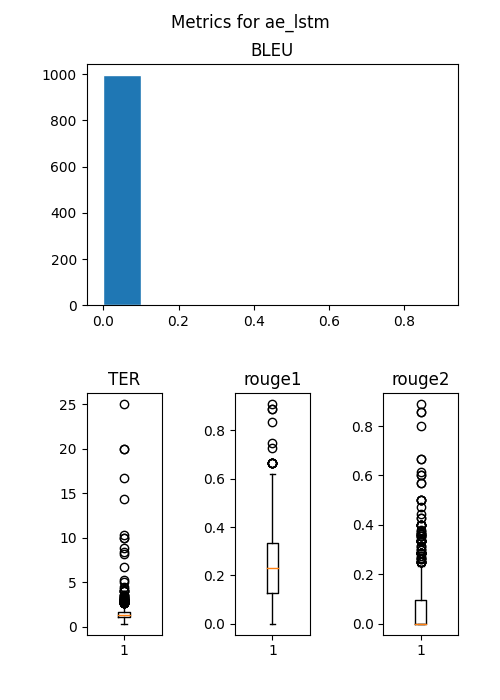

In [63]:
display(Image(filename='text-detoxification/reports/figures/ae_lstm_metrics.png'))

In [64]:
calc_means("result_ae_lstm.json")

BLEU MEAN: 0.00249492580240423
TER MEAN: 1.5939121568179155
ROUGE1 F1 MEAN: 0.23202717697227393
ROUGE2 F1 MEAN: 0.064495811134681


<font color="cyan">Transformer evaluation</font>

In [65]:
!python text-detoxification/src/models/predict_model.py transformer transformer.pt text-detoxification/data/external/test1000.txt --compare text-detoxification/data/external/compare1000.txt --out_dir result_transformer.json

2023-10-22 12:15:21.363280: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [66]:
!python text-detoxification/src/visualization/visualize.py --metric_file result_transformer.json --model_name transformer

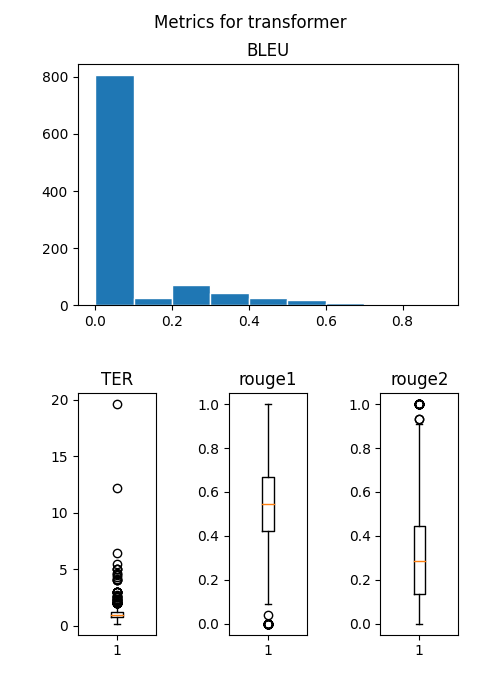

In [67]:
display(Image(filename='text-detoxification/reports/figures/transformer_metrics.png'))

In [68]:
calc_means("result_transformer.json")

BLEU MEAN: 0.06694282379213508
TER MEAN: 1.0875928943658566
ROUGE1 F1 MEAN: 0.5408674843691208
ROUGE2 F1 MEAN: 0.305278749140975


<font color="cyan">T5 evaluation</font>

In [69]:
!python text-detoxification/src/models/predict_model.py T5 _ text-detoxification/data/external/test1000.txt --compare text-detoxification/data/external/compare1000.txt --out_dir result_T5.json

2023-10-22 12:17:09.018764: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [70]:
!python text-detoxification/src/visualization/visualize.py --metric_file result_T5.json --model_name T5

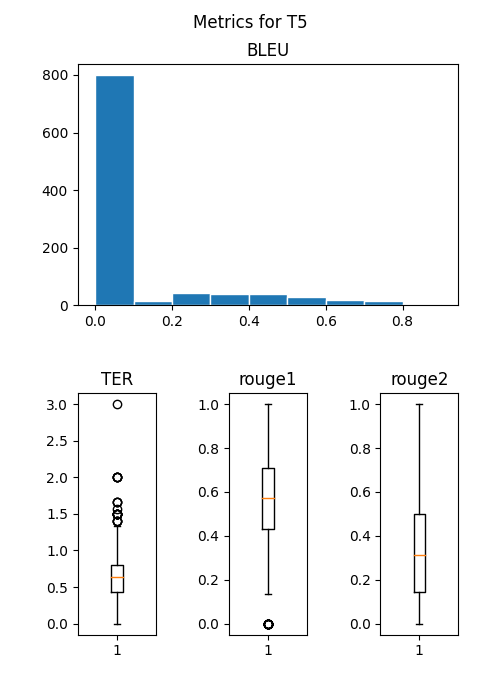

In [71]:
display(Image(filename='text-detoxification/reports/figures/T5_metrics.png'))

In [72]:
calc_means("result_T5.json")

BLEU MEAN: 0.08652995650067583
TER MEAN: 0.642475651508266
ROUGE1 F1 MEAN: 0.5694778469148335
ROUGE2 F1 MEAN: 0.3427342285330479


###<font color="lime">Note:</font>
T5 transformer has the best metrics!